<h1 style='text-align:center;border-radius:20px ;border:3px solid #c54E58 ;color : white;  padding: 15px; font-size: 45pt; background-color:purple'>SALES PREDICTION</h1>

<div style="border-radius:20px ;border:3px solid #c54E58 ;color : Blue;  padding: 15px; font-size: 14pt; background-color: ; text-align:left">
    

    
This project focuses on predicting sales for businesses that offer products or services, aiming to forecast the amount of a product that customers will purchase. By analyzing key factors such as advertising expenditure, target audience segmentation, and advertising platform selection, the project seeks to provide businesses with actionable insights to optimize their sales strategies.

The core of the project lies in using Python and machine learning techniques to develop a predictive model that analyzes historical sales data along with relevant marketing metrics. These include advertising spend, and the performance of different advertising platforms. The goal is to predict future sales volumes based on these factors, which can help businesses make informed decisions regarding their advertising budgets and marketing strategies.

In addition to the sales prediction model, the project will employ advanced techniques for feature engineering, data visualization, and exploratory data analysis (EDA) to identify trends and patterns within the data. This allows for a deeper understanding of how various factors influence sales outcomes. By leveraging machine learning algorithms, the model will be able to forecast future sales with a high degree of accuracy, empowering businesses to tailor their marketing strategies for maximum impact.

The project's ultimate aim is to enhance business decision-making, enabling companies to allocate resources effectively, improve advertising strategies, and maximize sales potential. By forecasting future sales and providing data-driven insights, this project will help businesses achieve greater operational efficiency and drive growth.
</div>

<div style="border-radius:20px ;border:3px solid gray ;color : blue;  padding: 15px; background-color:  rgba(135, 206, 235, 0.4); text-align:left">
<a id="met"></a>
<h2> Methodology for Analyzing Features</h2>

The methodology for analyzing features in this sales prediction project follows a structured approach to gain insights into the data and understand the relationships between variables that influence sales outcomes.
    

* **Conduct an Overview of Data:**

    - Examine the dataset for missing values, duplicates, and other data quality issues.
    - Assess the distribution of key features and identify potential outliers.
    - Summarize the central tendency and variability of numerical variables like sales and advertising expenditure.
    

* **Categorize Features:**

    - Categorize the features into relevant groups, such as financial (e.g., advertising expenditure, sales), and platform-related features (e.g., advertising channels, campaigns).
    

* **Formulate Hypotheses:**

    - State the null hypothesis (H0), which assumes that there is no significant relationship between advertising expenditure, target audience segmentation, and sales. This hypothesis will be tested to understand the predictors of sales performance.
    

* **Statistical Testing:**

    Use appropriate statistical tests to examine the relationships between features:
    
    - **Correlation Analysis** to evaluate the strength and direction of relationships between numerical features like sales and advertising spend.
 

* **Visual Analysis:**

    - Leverage visual tools such as line graphs, bar charts, scatter plots, and heatmaps to identify trends, correlations, and the impact of advertising factors on sales.
    - Use box plots and histograms to understand the distribution of continuous variables and detect any skewness or outliers (if any).
    

* **Incorporate Observations:**

    - Based on the results of statistical testing and visual analysis, incorporate observations regarding how various factors (e.g., advertising spend, platform choice) influence sales and their contribution to the predictive model.
    
</div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> DATA OVERVIEW </b></div>
<a id="data"></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns

# Setting style for the plots
sns.set(style="whitegrid")


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
ad = pd.read_csv("advertising.csv")
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
ad.shape

(200, 4)

In [5]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Check data types and unique values to confirm there are no unusual data entries or types
ad.dtypes, ad.nunique()


(TV           float64
 Radio        float64
 Newspaper    float64
 Sales        float64
 dtype: object,
 TV           190
 Radio        167
 Newspaper    172
 Sales        121
 dtype: int64)

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> STATISTICAL ANALYSIS</b></div>
<a id="analysis"></a>

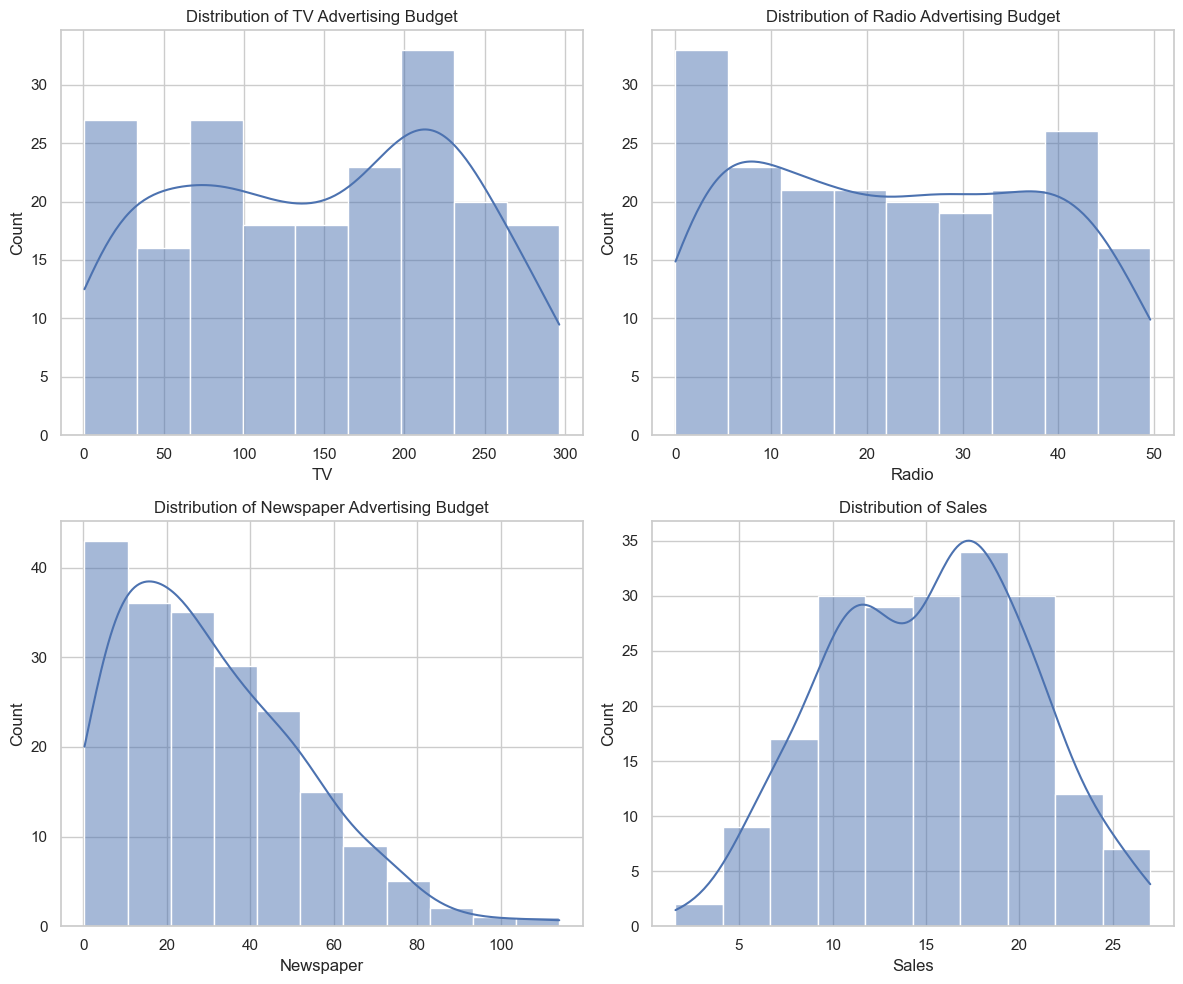

In [7]:
# Plotting distributions for each feature and target variable
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(ad['TV'], kde=True, ax=axs[0, 0]).set(title='Distribution of TV Advertising Budget')
sns.histplot(ad['Radio'], kde=True, ax=axs[0, 1]).set(title='Distribution of Radio Advertising Budget')
sns.histplot(ad['Newspaper'], kde=True, ax=axs[1, 0]).set(title='Distribution of Newspaper Advertising Budget')
sns.histplot(ad['Sales'], kde=True, ax=axs[1, 1]).set(title='Distribution of Sales')

plt.tight_layout()
plt.show()

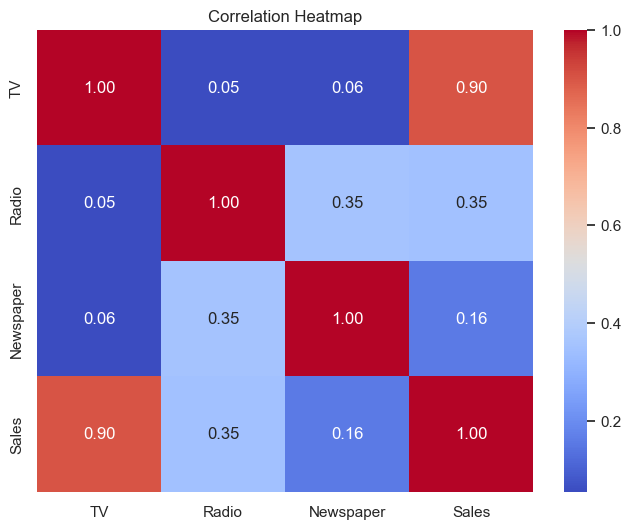

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ad.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Idongesit Usoro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


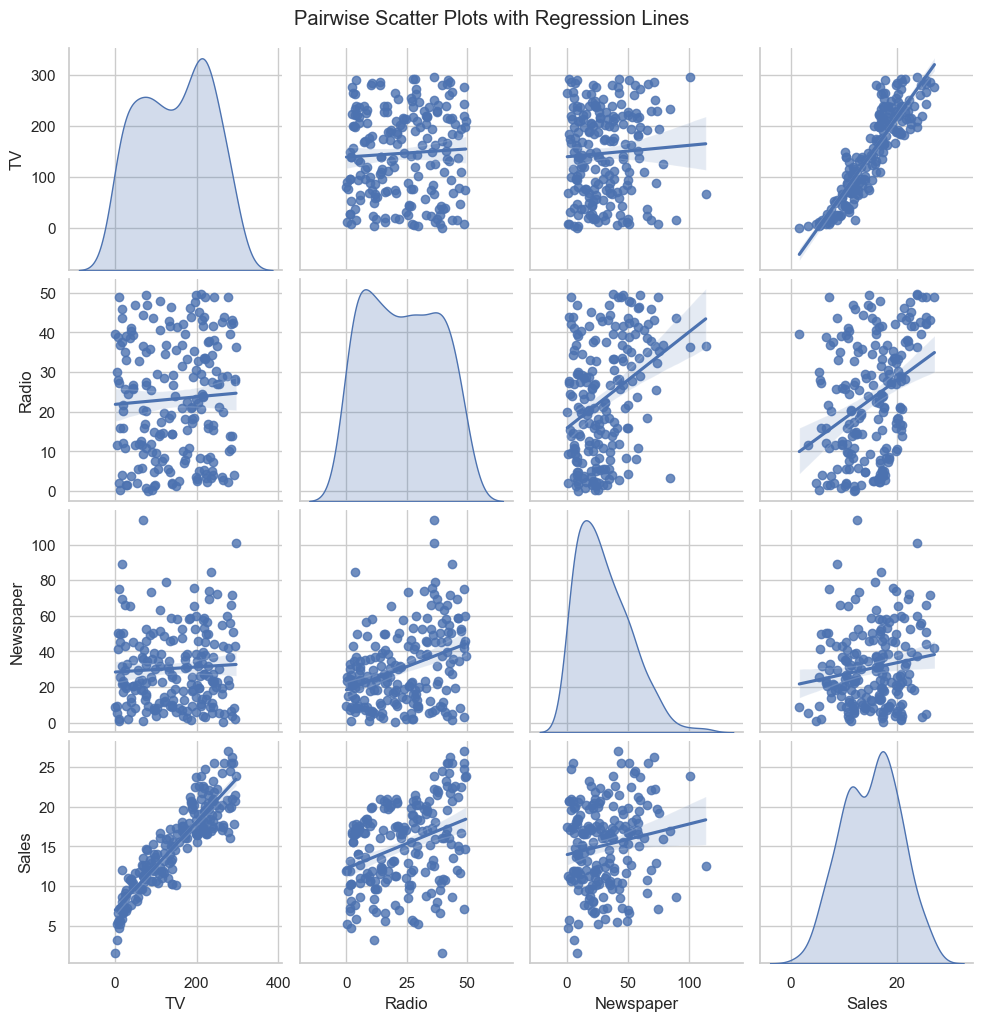

In [9]:
# Pairplot to examine linear relationships
sns.pairplot(ad, kind="reg", diag_kind="kde")
plt.suptitle("Pairwise Scatter Plots with Regression Lines", y=1.02)
plt.show();

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> FEATURE ENGINEERING & SELECTION</b></div>
<a id="engine"></a>

In [10]:
# Feature Engineering
ad['TV_Radio'] = ad['TV'] * ad['Radio']
ad['TV_Newspaper'] = ad['TV'] * ad['Newspaper']
ad['Radio_Newspaper'] = ad['Radio'] * ad['Newspaper']


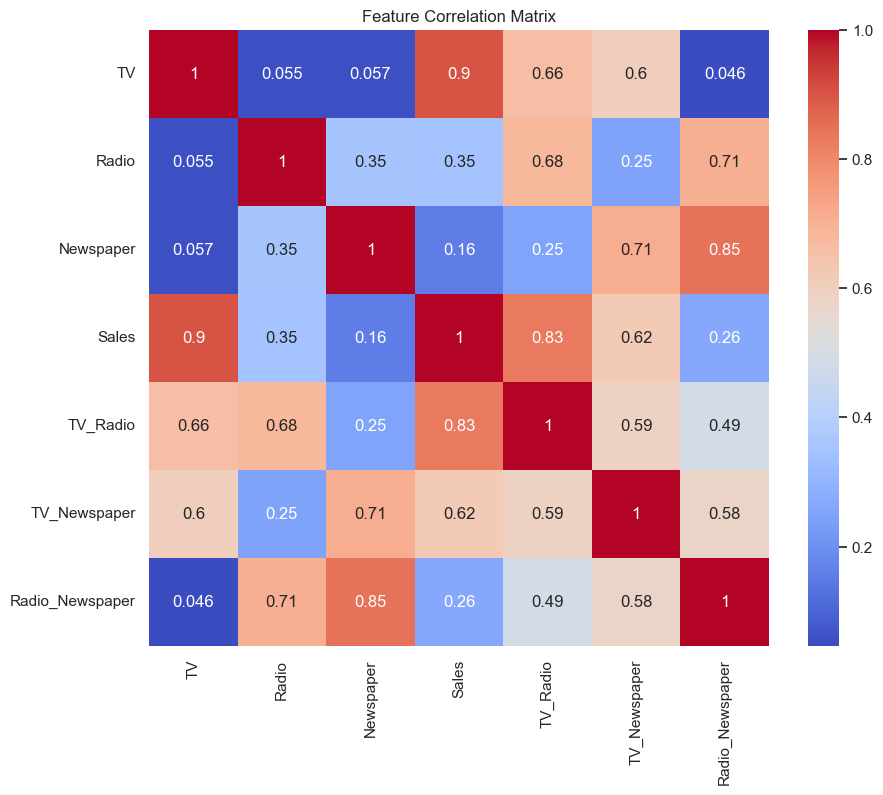

In [11]:
# Correlation Matrix to Identify Important Features
plt.figure(figsize=(10, 8))
sns.heatmap(ad.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting Features Based on Correlation Threshold
corr_matrix = ad.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["Sales"]) > 0.3]
ad = ad[high_corr_features]


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b>MODEL TRAINING AND EVALUATION</b></div>
<a id="model"></a>

In [12]:
# Splitting the data into features and target variable
X = ad.drop("Sales", axis=1)
y = ad["Sales"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# <div style="padding:15px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:5px;background-color:blue;overflow:hidden; font-family: 'Lucida Console'"><b> 1. RANDOM FOREST REGRESSOR</b></div>
<a id="rf"></a>

In [13]:
# 1. Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, rf_preds)
rmse = mean_squared_error(y_test, rf_preds, squared=False)

# Print the results
print(f"RandomForest - MAE: {mae:.2f}, RMSE: {rmse:.2f}")


RandomForest - MAE: 0.74, RMSE: 1.10


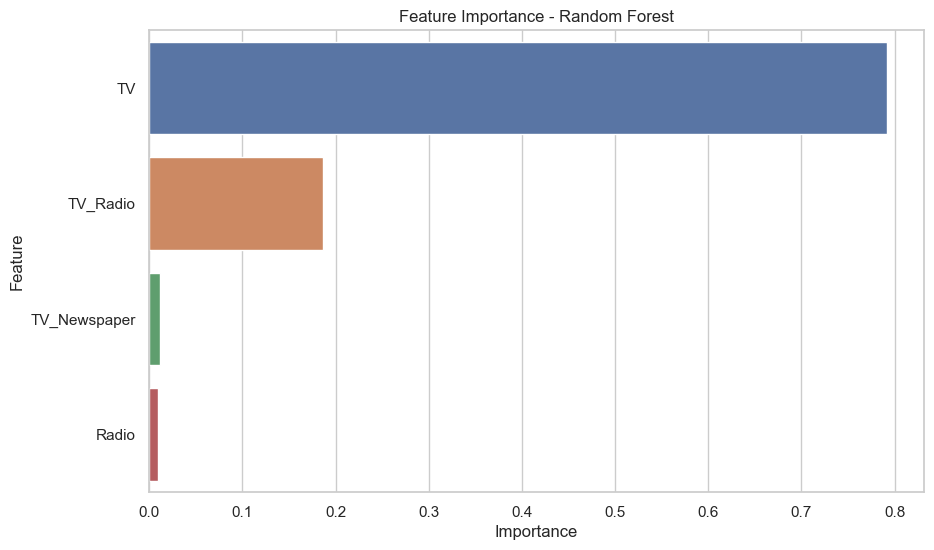

In [14]:
# Plot feature importance for Random Forest
importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)  # Corrected line
plt.title("Feature Importance - Random Forest")
plt.show()


# <div style="padding:15px;color:white;margin:0;font-size:25px;text-align:center;display:fill;border-radius:5px;background-color:blue;overflow:hidden; font-family: 'Lucida Console'"><b>2.  GRADIENT BOOSTING REGRESSOR</b></div>
<a id="gb"></a>

In [15]:
# 2. Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, gb_preds)
rmse = mean_squared_error(y_test, gb_preds, squared=False)

# Print the results
print(f"Gradient Boosting - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Gradient Boosting - MAE: 0.70, RMSE: 1.12


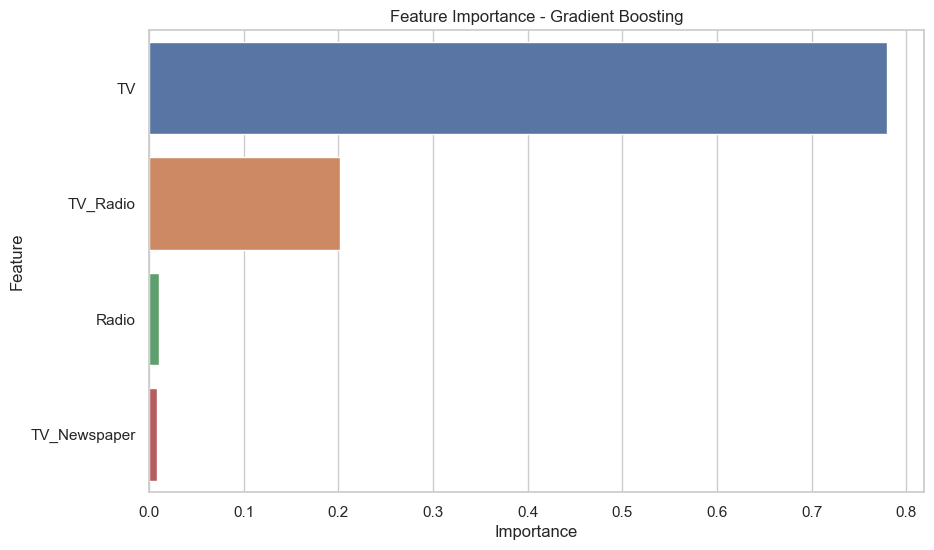

In [16]:
# Plot feature importance for Gradient Boosting
importances = gb.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance - Gradient Boosting")
plt.show()


<div style="border-radius:30px; border:Indigo solid; color:#c54E58; padding: 15px; background-color: rgba(245, 222, 179, 0.75); text-align:left">

> ## Sales Prediction Recap:
>> * **TV and Radio advertising** have the strongest influence on sales, as shown by high correlation values and feature importance scores in both the Random Forest and Gradient Boosting models.
>> * **TV and Radio interaction** (`TV_Radio`) also emerged as a significant factor, suggesting that combined ad spending on these platforms may yield enhanced results.
>> * The **Gradient Boosting model** achieved the best predictive performance with the lowest MAE and RMSE (`0.70 & 1.12`), indicating it may be the most suitable model for accurate sales forecasting.
>> * The **Random Forest model** also performed well with MAE and RMSE (`0.74 & 1.10`) and provides insights into feature importance, confirming the importance of TV and Radio advertising on sales.

</div>
